In [4]:
import pandas as pd

## Data Load

In [3]:
security_con = pd.read_csv('./security_con.csv')
security_con.head()

,Unnamed: 0,year,address,light_cnt,lon,lat,geometry,jur_stn
0,0,NaN,세종특별자치시 금남면 감성리 64-2,1,127.287690,36.443467,POINT (127.28769 36.443467),세종경찰서
1,1,NaN,세종특별자치시 금남면 감성리 267,1,127.288812,36.444181,POINT (127.288812 36.444181),세종경찰서
2,2,NaN,세종특별자치시 금남면 감성리 40-1,1,127.289575,36.444711,POINT (127.289575 36.444711),세종경찰서
3,3,NaN,세종특별자치시 금남면 감성리 26,1,127.290071,36.444455,POINT (127.290071 36.444455),세종경찰서
4,4,NaN,세종특별자치시 금남면 감성리 267,1,127.290002,36.444188,POINT (127.290002 36.444188),세종경찰서


In [52]:
cctv_con = pd.read_csv('./cctv_con.csv')
cctv_con.head()

,Unnamed: 0,address,purpose,cctv_cnt,set_yr,lat,lon,geometry,jur_stn
0,0,세종특별자치시 조치원읍 교리 129-1,다목적,3,NaN,36.605060,127.296286,POINT (127.296286 36.6050595),세종경찰서
1,1,세종특별자치시 조치원읍 남리144,다목적,2,NaN,36.597678,127.302452,POINT (127.3024523 36.597678),세종경찰서
2,2,세종특별자치시 조치원읍 남리 425,다목적,3,NaN,36.594863,127.300492,POINT (127.300492 36.594863),세종경찰서
3,3,세종특별자치시 조치원읍 명리82,다목적,3,NaN,36.600620,127.301301,POINT (127.301301 36.60062),세종경찰서
4,4,세종특별자치시 조치원읍 상리18-10,다목적,4,NaN,36.602434,127.303145,POINT (127.3031453 36.6024343),세종경찰서


In [81]:
bell_con = pd.read_csv('./emergency_bell.csv')
bell_con.head()

,Unnamed: 0,bell_us,bell_set_fac,bell_loc,bell_set_yr,geometry,jur_stn
0,0,기타,화장실,오가낭뜰 근린공원(간이),2017,MULTIPOINT (127.2488021850586 36.51229858398438),세종경찰서
1,1,기타,화장실,어진동음악분수,2017,MULTIPOINT (127.2565994262695 36.50189971923828),세종경찰서
2,2,기타,화장실,제천(간이),2017,MULTIPOINT (127.2565994262695 36.50189971923828),세종경찰서
3,3,기타,화장실,도시공원1(남리도시 공원화장실1),2017,MULTIPOINT (127.3025970458984 36.59780120849609),세종경찰서
4,4,기타,화장실,부강면 전통시장 화장실,2017,MULTIPOINT (127.3674011230469 36.52949905395508),세종경찰서


In [39]:
pop_df= pd.read_csv('./인구정보종합.csv')
pop_df.head()

,Unnamed: 0,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
0,0,서울중부경찰서,2017(상반기),중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0
1,1,서울종로경찰서,2017(상반기),종로구,2017.0,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979.0
2,2,서울남대문경찰서,2017(상반기),중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0
3,3,서울서대문경찰서,2017(상반기),서대문구,2017.0,321345.0,32337.0,242443.0,46565.0,41.3,88.8,102.8,90.2,73.6,13152.0
4,4,서울혜화경찰서,2017(상반기),종로구,2017.0,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979.0


# ----------------------------------------------------

## ※ 목표 Q1 ~ Q5 예측 시 X값으로 보안등, 비상벨, CCTV 개수를 활용
- 0.1, 0.2 에서 관할서 넣은 csv file을 로드하여 관할서별 상,하반기 count

### 1. 보안등

In [27]:
# 보안등 개수 (light_cnt) 관할서별 count
sec_cnt = security_con.groupby('jur_stn').sum()[['light_cnt']]
sec_cnt.reset_index(inplace=True)
sec_cnt.head()

,jur_stn,light_cnt
0,마산동부경찰서,5647
1,마산중부경찰서,6821
2,서울강남경찰서,5029
3,서울강동경찰서,7500
4,서울강북경찰서,8431


In [28]:
len(sec_cnt['jur_stn'].unique()) # 2개 관할서 누락되어있음

39

In [29]:
# data check
sec_cnt['light_cnt'].describe()

count       39.000000
mean      5985.256410
std       2530.969512
min          1.000000
25%       4143.000000
50%       6153.000000
75%       7722.000000
max      11882.000000
Name: light_cnt, dtype: float64

<AxesSubplot:>

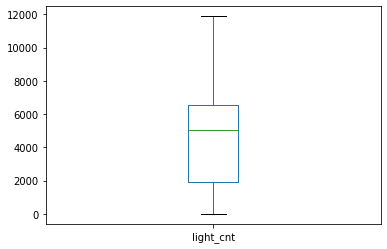

In [30]:
sec_cnt['light_cnt'].describe().plot(kind='box')

In [33]:
# 비수도권 현황 확인
not_seoul = sec_cnt.drop(sec_cnt[sec_cnt['jur_stn'].str.contains('서울')].index)
print('비수도권 평균 :' , not_seoul['light_cnt'].mean())

비수도권 평균 : 5558.3


In [48]:
# 서울권 현황 확인
seoul = sec_cnt[sec_cnt['jur_stn'].str.contains('서울')]
print('수도권 평균 :' , seoul['light_cnt'].mean())

수도권 평균 : 6300.137931034483


In [38]:
sec_cnt[sec_cnt['light_cnt'] < 4000].sort_values('light_cnt').head() # 4000 이하 값 확인(하위 25% 미만)
# --> 지나치게 낮은 값이 발견됨.(동대문 1, 남대문 1137)

,jur_stn,light_cnt
13,서울동대문경찰서,1
10,서울남대문경찰서,1137
38,창원중부경찰서,2895
22,서울수서경찰서,3031
36,진해경찰서,3218


In [41]:
### light_cnt 수치 교정
sec_cnt['light_cnt'] = sec_cnt['light_cnt'].apply(lambda x : 3000 if x < 3000 else x)
#sec_cnt['light_cnt'].fillna(3000, inplace=True)

#### merge

In [43]:
# 관할서별 상, 하반기 구분을 위해 pop data의 jur_stn, date 컬럼과 merge 함
sec_df = pd.merge(pop_df[['jur_stn','date']] , sec_cnt , on='jur_stn' ,how='left')
sec_df.head()

,jur_stn,date,light_cnt
0,서울중부경찰서,2017(상반기),4933.0
1,서울종로경찰서,2017(상반기),5259.0
2,서울남대문경찰서,2017(상반기),3000.0
3,서울서대문경찰서,2017(상반기),6938.0
4,서울혜화경찰서,2017(상반기),4256.0


In [44]:
sec_df['date'].value_counts()

2020(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(하반기)    41
2018(상반기)    41
2017(상반기)    41
2018(하반기)    41
2019(하반기)    41
Name: date, dtype: int64

In [45]:
## NA check
sec_df.isnull().sum()

jur_stn       0
date          0
light_cnt    16
dtype: int64

In [47]:
sec_df[sec_df['light_cnt'].isnull()].head()
# --> 서울송파, 서울양천 데이터가 비어있음

,jur_stn,date,light_cnt
24,서울양천경찰서,2017(상반기),NaN
25,서울송파경찰서,2017(상반기),NaN
65,서울양천경찰서,2017(하반기),NaN
66,서울송파경찰서,2017(하반기),NaN
106,서울양천경찰서,2018(상반기),NaN


In [49]:
# fill na --> 수도권 평균으로 fillNa
sec_df.fillna(seoul['light_cnt'].mean(), inplace=True)
sec_df.isnull().sum().sum()

0

### 2. CCTV

In [53]:
# cctv 개수 (cctv_cnt) 관할서별 count
cctv_cnt = cctv_con.groupby('jur_stn').sum()[['cctv_cnt']]
cctv_cnt.reset_index(inplace=True)
cctv_cnt.head()

,jur_stn,cctv_cnt
0,마산동부경찰서,1218
1,마산중부경찰서,911
2,서울강남경찰서,3095
3,서울강북경찰서,2299
4,서울강서경찰서,2377


In [55]:
len(cctv_cnt['jur_stn'].unique()) # 관할서 한개 비어있음

40

In [58]:
# data check
cctv_cnt['cctv_cnt'].describe()

count      40.000000
mean     2483.550000
std      1417.847465
min        10.000000
25%      1529.500000
50%      2308.000000
75%      3153.250000
max      6459.000000
Name: cctv_cnt, dtype: float64

<AxesSubplot:>

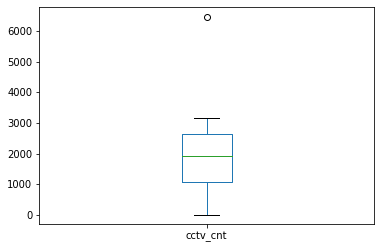

In [59]:
cctv_cnt['cctv_cnt'].describe().plot(kind='box')

In [63]:
# 비수도권 현황 확인
not_seoul = cctv_cnt.drop(cctv_cnt[cctv_cnt['jur_stn'].str.contains('서울')].index)
print('비수도권 평균 :' , not_seoul['cctv_cnt'].mean())

비수도권 평균 : 2306.3


In [65]:
# 서울권 현황 확인
seoul = cctv_cnt[cctv_cnt['jur_stn'].str.contains('서울')]
print('수도권 평균 :' , seoul['cctv_cnt'].mean())

수도권 평균 : 2542.633333333333


In [62]:
cctv_cnt[cctv_cnt['cctv_cnt']<1500].head() # 1500 이하 값 확인(하위 25% 미만)
# --> 지나치게 낮은 값이 발견됨.(도봉, 동대문 등)

,jur_stn,cctv_cnt
0,마산동부경찰서,1218
1,마산중부경찰서,911
9,서울남대문경찰서,725
11,서울도봉경찰서,10
12,서울동대문경찰서,26


In [70]:
# cctv_cnt 수치 교정
# 1000 미만 값 1500으로 교정
cctv_cnt['cctv_cnt'] = cctv_cnt['cctv_cnt'].apply(lambda x : 1500 if x < 1000 else x)

#### merge

In [71]:
# 관할서별 상, 하반기 구분을 위해 pop data의 jur_stn, date 컬럼과 merge 함
cctv_df = pd.merge(pop_df[['jur_stn','date']] , cctv_cnt , on='jur_stn' ,how='left')
cctv_df.head()

,jur_stn,date,cctv_cnt
0,서울중부경찰서,2017(상반기),1563.0
1,서울종로경찰서,2017(상반기),1500.0
2,서울남대문경찰서,2017(상반기),1500.0
3,서울서대문경찰서,2017(상반기),2938.0
4,서울혜화경찰서,2017(상반기),1500.0


In [72]:
cctv_df['date'].value_counts()

2020(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(하반기)    41
2018(상반기)    41
2017(상반기)    41
2018(하반기)    41
2019(하반기)    41
Name: date, dtype: int64

In [73]:
## NA check
cctv_df.isnull().sum()

jur_stn     0
date        0
cctv_cnt    8
dtype: int64

In [77]:
cctv_df[cctv_df['cctv_cnt'].isnull()].head()
# --> 서울강동 데이터가 비어있음

,jur_stn,date,cctv_cnt
20,서울강동경찰서,2017(상반기),NaN
61,서울강동경찰서,2017(하반기),NaN
102,서울강동경찰서,2018(상반기),NaN
143,서울강동경찰서,2018(하반기),NaN
184,서울강동경찰서,2019(상반기),NaN


In [78]:
# fill na --> 수도권 평균으로 fillNa
cctv_df.fillna(seoul['cctv_cnt'].mean(), inplace=True)
cctv_df.isnull().sum().sum()

0

### 3. 비상벨

In [83]:
# 비상벨 개수 (bell_cnt) 관할서별 count
bell_cnt= bell_con.groupby('jur_stn').count()[['bell_us']]
bell_cnt= bell_cnt.rename(columns={'bell_us' : 'bell_cnt'})
bell_cnt = bell_cnt.reset_index()
bell_cnt.head()

,jur_stn,bell_cnt
0,마산동부경찰서,11
1,마산중부경찰서,14
2,서울강남경찰서,649
3,서울강동경찰서,2
4,서울강북경찰서,22


In [85]:
len(bell_cnt['jur_stn'].unique()) # 1개 관할서 누락

40

In [87]:
# data check
bell_cnt['bell_cnt'].describe()

count      40.000000
mean      458.350000
std       468.895459
min         2.000000
25%        39.000000
50%       346.000000
75%       818.500000
max      1780.000000
Name: bell_cnt, dtype: float64

<AxesSubplot:>

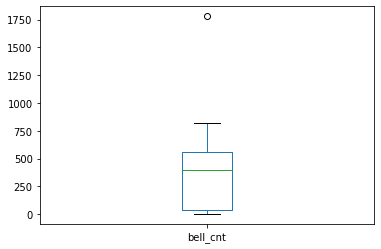

In [89]:
bell_cnt['bell_cnt'].describe().plot(kind='box')

In [93]:
# 비수도권 현황 확인
not_seoul = bell_cnt.drop(bell_cnt[bell_cnt['jur_stn'].str.contains('서울')].index)
print('비수도권 평균 :' , not_seoul['bell_cnt'].mean())

비수도권 평균 : 110.8


In [94]:
# 서울권 현황 확인
seoul = bell_cnt[bell_cnt['jur_stn'].str.contains('서울')]
print('수도권 평균 :' , seoul['bell_cnt'].mean())

# --> 수도권, 비수도권 격차가 큼

수도권 평균 : 574.2


In [96]:
bell_cnt[bell_cnt['bell_cnt']<40].head() # 40 이하 값 확인(하위 25% 미만)
# --> 지나치게 낮은 값이 발견됨.(강동, 동대문 등)

,jur_stn,bell_cnt
0,마산동부경찰서,11
1,마산중부경찰서,14
3,서울강동경찰서,2
4,서울강북경찰서,22
12,서울동대문경찰서,4


In [110]:
## bell_cnt 수치 교정
## 비수도권은 비수도권 평균, 수도권은 수도권 평균보다 살짝 낮게 채움
for i in not_seoul.index :
    if bell_cnt.loc[i, 'bell_cnt'] < 100 :
        bell_cnt.loc[i, 'bell_cnt'] = 100
for i in seoul.index :
    if bell_cnt.loc[i, 'bell_cnt'] < 100 :
        bell_cnt.loc[i, 'bell_cnt'] = 450

#### merge

In [111]:
# 관할서별 상, 하반기 구분을 위해 pop data의 jur_stn, date 컬럼과 merge 함
bell_df = pd.merge(pop_df[['jur_stn','date']] , bell_cnt , on='jur_stn' ,how='left')
bell_df.head()

,jur_stn,date,bell_cnt
0,서울중부경찰서,2017(상반기),406.0
1,서울종로경찰서,2017(상반기),450.0
2,서울남대문경찰서,2017(상반기),203.0
3,서울서대문경찰서,2017(상반기),401.0
4,서울혜화경찰서,2017(상반기),450.0


In [112]:
bell_df['date'].value_counts()

2020(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(하반기)    41
2018(상반기)    41
2017(상반기)    41
2018(하반기)    41
2019(하반기)    41
Name: date, dtype: int64

In [113]:
## NA check
bell_df.isnull().sum()

jur_stn     0
date        0
bell_cnt    8
dtype: int64

In [114]:
bell_df[bell_df['bell_cnt'].isnull()].head()
# --> 서울도봉 데이터가 비어있음

,jur_stn,date,bell_cnt
29,서울도봉경찰서,2017(상반기),NaN
70,서울도봉경찰서,2017(하반기),NaN
111,서울도봉경찰서,2018(상반기),NaN
152,서울도봉경찰서,2018(하반기),NaN
193,서울도봉경찰서,2019(상반기),NaN


In [115]:
# fill na --> 수도권 평균으로 fillNa
bell_df.fillna(seoul['bell_cnt'].mean(), inplace=True)
bell_df.isnull().sum().sum()

0

## 4. 최종(Merge)

In [119]:
# 위에서 실행하여 얻은 최종 df merge
temp_df = pd.merge(sec_df, cctv_df, on=['jur_stn','date'])
final_df = pd.merge(temp_df, bell_df, on=['jur_stn','date'])

In [120]:
final_df['date'].value_counts()

2020(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(하반기)    41
2018(상반기)    41
2017(상반기)    41
2018(하반기)    41
2019(하반기)    41
Name: date, dtype: int64

In [121]:
final_df.to_csv('cctv_보안등_비상벨현황.csv')